In [1]:
import pandas as pd
import encodings
import datetime
#plotting and visualization library
import seaborn as sns
#output plots in the notebook
%matplotlib inline

In [ ]:
#Questions:
#Books read per year
#How many new books I added per month
#Number of read books per week

#How many books I have read per author
#The book I took longer to read (it is in my tbr from forever) and the book I took shorter to read


In [2]:
#I choose a encoding present in the file
aliases_values = set(encodings.aliases.aliases.values())
for encoding in set(encodings.aliases.aliases.values()):
    try:
        df = pd.read_csv(r"goodreads_library.csv", nrows=10,
                         encoding=encoding)
        # print("successful", encoding)
    except:
        pass

In [3]:
#Read the csv and display the data
df_books = pd.read_csv(r"goodreads_library.csv",
                       encoding="ISO-8859-9", sep=',', engine="python")
df_books.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies
0,156976346,L'Immortale,Catherynne M. Valente,"Valente, Catherynne M.",NaN,"=""""","=""""",0,3.97,Fazi Editore,...,NaN,2023/08/19,to-read,to-read (#479),to-read,NaN,NaN,NaN,0,0
1,58690308,Book Lovers,Emily Henry,"Henry, Emily",NaN,"=""""","=""""",0,4.17,Berkley,...,NaN,2023/04/18,currently-reading,currently-reading (#4),currently-reading,NaN,NaN,NaN,1,0
2,66087070,Suddenly a Murder,Lauren MuÃ±oz,"MuÃ±oz, Lauren",NaN,"=""0593617533""","=""9780593617533""",0,3.96,G.P. Putnam's Sons Books for Young Readers,...,NaN,2023/08/19,to-read,to-read (#478),to-read,NaN,NaN,NaN,0,0
3,157062582,"The Mystery Guest (Molly the Maid, #2)",Nita Prose,"Prose, Nita",NaN,"=""0593356187""","=""9780593356180""",0,4.11,Ballantine Books,...,NaN,2023/08/19,to-read,to-read (#477),to-read,NaN,NaN,NaN,0,0
4,75293475,"The Last Devil to Die (Thursday Murder Club, #4)",Richard Osman,"Osman, Richard",NaN,"=""0593299426""","=""9780593299425""",0,4.50,Pamela Dorman Books,...,NaN,2023/08/19,to-read,to-read (#476),to-read,NaN,NaN,NaN,0,0


In [4]:
#CHECK IF THE MAIN COLUMN HAVE NULL VALUES

In [5]:
#Main column: books' titles
if(df_books['Title'].isnull().sum()==0):
    print('All the titles are present')
else:
    print('Not all the titles are present')

All the titles are present


In [6]:
#Main column: books' authors
if(df_books['Author'].isnull().sum()==0):
    print('All the authors are present')
else:
    print('Not all the authors are present')

All the authors are present


In [7]:
#Main column: books' average ratings
if(df_books['Average Rating'].isnull().sum()==0):
    print('All the books have a rate')
else:
    print('Not all the books have a rate')

All the books have a rate


In [8]:
#Main column: books' ID
if(df_books['Book Id'].isnull().sum()==0):
    print('All the books have a ID')
else:
    print('Not all the books have a ID')

All the books have a ID


In [9]:
#DROP NOT USEFUL COLUMNS
to_drop = ['ISBN13', 'Binding', 'Spoiler', 'Private Notes', 'Owned Copies', 'Bookshelves', 'Bookshelves with positions', 'ISBN']
df_books.drop(to_drop, inplace=True, axis=1)
print("I drop the following columns because not usefull for the analysis:")
for i in range(len(to_drop)):
    print(to_drop[i])

I drop the following columns because not usefull for the analysis:
['ISBN13', 'Binding', 'Spoiler', 'Private Notes', 'Owned Copies', 'Bookshelves', 'Bookshelves with positions', 'ISBN']
ISBN13
Binding
Spoiler
Private Notes
Owned Copies
Bookshelves
Bookshelves with positions
ISBN


In [10]:
df_books.head()

,Book Id,Title,Author,Author l-f,Additional Authors,My Rating,Average Rating,Publisher,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,My Review,Read Count
0,156976346,L'Immortale,Catherynne M. Valente,"Valente, Catherynne M.",NaN,0,3.97,Fazi Editore,346.0,2023.0,2011.0,NaN,2023/08/19,to-read,NaN,0
1,58690308,Book Lovers,Emily Henry,"Henry, Emily",NaN,0,4.17,Berkley,377.0,2022.0,2022.0,NaN,2023/04/18,currently-reading,NaN,1
2,66087070,Suddenly a Murder,Lauren MuÃ±oz,"MuÃ±oz, Lauren",NaN,0,3.96,G.P. Putnam's Sons Books for Young Readers,320.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0
3,157062582,"The Mystery Guest (Molly the Maid, #2)",Nita Prose,"Prose, Nita",NaN,0,4.11,Ballantine Books,304.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0
4,75293475,"The Last Devil to Die (Thursday Murder Club, #4)",Richard Osman,"Osman, Richard",NaN,0,4.50,Pamela Dorman Books,368.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0


In [11]:
#"Additional Author" is a valuable column?
if(df_books['Additional Authors'].isnull().sum()==843):
    print('No additiona Authors')
else:
    #How many "Additional Authors we have
    add_auth = len(df_books) - df_books['Additional Authors'].isnull().sum()
    print(add_auth, "additional authors are present in <Additional Author> column" )

241 additional authors are present in <Additional Author> column


In [12]:
#Check the additional authors
df_books.loc[df_books['Additional Authors'].notna()]

,Book Id,Title,Author,Author l-f,Additional Authors,My Rating,Average Rating,Publisher,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,My Review,Read Count
27,3264497,Orgoglio e pregiudizio,Jane Austen,"Austen, Jane","Giulio Caprin, W. Somerset Maugham",4,4.28,Mondadori,390.0,2002.0,1813.0,2023/08/19,2023/08/15,read,"Nonostante abbia 210 anni, Orgoglio e Pregiudi...",1
30,28169059,"Intestino, secondo cervello: Le rivoluzionarie...",Miguel Ãngel AlmodÃ³var,"AlmodÃ³var, Miguel Ãngel",Nicola Jacchia,5,3.81,Vallardi,221.0,2015.0,2014.0,2021/09/04,2020/11/28,read-2021,NaN,1
32,58990922,Fiori di stagione,Emmanuelle Kecir-Lepetit,"Kecir-Lepetit, Emmanuelle","Lea Maupetit, Vera Verdiani",0,4.33,Ippocampo edizioni,96.0,2021.0,NaN,NaN,2023/07/04,to-read,NaN,0
33,58990941,Alberi di qui e d'altrove,Emmanuelle Kecir-Lepetit,"Kecir-Lepetit, Emmanuelle","Lea Maupetit, Vera Verdiani",0,4.50,Ippocampo edizioni,96.0,2021.0,NaN,NaN,2023/07/04,to-read,NaN,0
47,18795453,IO Sono Piccola?,Philipp Winterberg,"Winterberg, Philipp",Nadja Wichmann,4,4.17,CreateSpace Independent Publishing Platform,40.0,2013.0,NaN,2018/08/15,2018/08/14,read,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,10165178,La lega degli uomini spaventati,Rex Stout,"Stout, Rex",Alfredo Pitta,2,4.08,Arnoldo Mondadori,191.0,2004.0,1935.0,2018/08/15,2018/08/15,read,NaN,1
815,27408440,L'ottava moglie di mister G,Elizabeth Ferrars,"Ferrars, Elizabeth",Lina Rolli,2,3.14,Mondadori,170.0,1973.0,1991.0,2018/08/15,2018/08/15,read,NaN,1
817,25140407,Un lungo fatale ultimo addio,Raffaella V. Poggi,"Poggi, Raffaella V.",VeloNero,3,3.68,Newton Compton Editori,288.0,2015.0,2014.0,2018/08/15,2018/08/15,read,NaN,1
821,25538992,Una spola di filo blu,Anne Tyler,"Tyler, Anne",Laura Pignatti,3,3.43,Guanda,400.0,2015.0,2015.0,2018/08/15,2018/08/15,read,NaN,2


In [13]:
#Drop the "Author" column instead of "Author l-f": in "Author l-f" we have author define by last name (l) and first name (f)
if(df_books['Author l-f'].isnull().sum()==0):
    print('All the authors last name - first name are present')
    df_books.drop('Author', inplace=True, axis=1)
    print('I dropped the <Author> column')
else:
    print('Not all the authors last name - first name are present')

All the authors last name - first name are present
I dropped the <Author> column


In [14]:
df_books.head()

,Book Id,Title,Author l-f,Additional Authors,My Rating,Average Rating,Publisher,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,My Review,Read Count
0,156976346,L'Immortale,"Valente, Catherynne M.",NaN,0,3.97,Fazi Editore,346.0,2023.0,2011.0,NaN,2023/08/19,to-read,NaN,0
1,58690308,Book Lovers,"Henry, Emily",NaN,0,4.17,Berkley,377.0,2022.0,2022.0,NaN,2023/04/18,currently-reading,NaN,1
2,66087070,Suddenly a Murder,"MuÃ±oz, Lauren",NaN,0,3.96,G.P. Putnam's Sons Books for Young Readers,320.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0
3,157062582,"The Mystery Guest (Molly the Maid, #2)","Prose, Nita",NaN,0,4.11,Ballantine Books,304.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0
4,75293475,"The Last Devil to Die (Thursday Murder Club, #4)","Osman, Richard",NaN,0,4.50,Pamela Dorman Books,368.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0


In [15]:
#Display info about df to check the data types
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Book Id                    843 non-null    int64  
 1   Title                      843 non-null    object 
 2   Author l-f                 843 non-null    object 
 3   Additional Authors         241 non-null    object 
 4   My Rating                  843 non-null    int64  
 5   Average Rating             843 non-null    float64
 6   Publisher                  831 non-null    object 
 7   Number of Pages            828 non-null    float64
 8   Year Published             841 non-null    float64
 9   Original Publication Year  752 non-null    float64
 10  Date Read                  230 non-null    object 
 11  Date Added                 843 non-null    object 
 12  Exclusive Shelf            843 non-null    object 
 13  My Review                  28 non-null     object 

In [16]:
#I am going to change float64 type for columns "Number of Pages" (int64), "Year published" (int64) and "Original Publication Year" (int64)
# NUMBER OF PAGES
print("Number of pages_ CLEANING")
#First, we can see that the columns has null values
nan_pages = df_books["Number of Pages"].isnull().sum()
print("Before the cleaning: Number of samples without a value: ", nan_pages)
#15 values are null
#I show the rows to see the data
df_books.loc[df_books["Number of Pages"].isnull()]
#I didn't find the number of pages of two rows, so I decided to add the mean number of pages.
mean_pages = int(df_books["Number of Pages"].mean())
#I replace the NaN values with the mean fo the column
df_books["Number of Pages"].fillna(mean_pages, inplace=True)
nan_pages_after = df_books["Number of Pages"].isnull().sum()
print("After the cleaning: Number of samples without a value: ", nan_pages_after)
df_books["Number of Pages"] = df_books["Number of Pages"].astype("int64", copy=False)

Number of pages_ CLEANING
Before the cleaning: Number of samples without a value:  15
After the cleaning: Number of samples without a value:  0


In [17]:
#YEAR PUBLISHED AND ORIGINAL PUBLICATION YEAR
# being year only, we treat them like a int
df_books.loc[df_books["Year Published"].isnull()]
#Only two: I add the right year of publishing
df_books.loc[290, "Year Published"] = 2009
df_books.loc[740, "Year Published"] = 1985
#I can't know easyly what the original publication year is for these books, so I put the value to 0
df_books["Original Publication Year"].fillna(0, inplace=True)
nan_pub_year_after = df_books["Original Publication Year"].isnull().sum()
#Print
print("YEAR PUBLISHED - After the cleaning: Number of samples without a value: ", nan_pub_year_after)
nan_real_pub_year_after = df_books["Original Publication Year"].isnull().sum()
print("ORIGINAL PUBLICATION YEAR - After the cleaning: Number of samples without a value: ", nan_real_pub_year_after)

YEAR PUBLISHED - After the cleaning: Number of samples without a value:  0
ORIGINAL PUBLICATION YEAR - After the cleaning: Number of samples without a value:  0


In [18]:
#We change the type of the columns FLOAT --> INT
df_books["Year Published"] = df_books["Year Published"].astype("int64", copy=False)
df_books["Original Publication Year"] = df_books["Original Publication Year"].astype("int64", copy=False)

In [19]:
#We have to change float64 type for columns "Date Read" (date), "Date Added" (date)
# DATE ADDED has not null values
df_books['Date Added'] = pd.to_datetime(df_books['Date Added'])

In [20]:
#Check the date validity
x = datetime.datetime(2017, 1, 1)
if(len(df_books.loc[df_books['Date Added'] < x]) == 0):
    print("All the value are ok")
else:
    print("Some values have a wrong date")

All the value are ok


In [21]:
#Change data type for "Date Read" column
df_books["Date Read"] = pd.to_datetime(df_books["Date Read"])

In [22]:
#Check if some book signed as "read" hasn't a value in "Date Read" column
if(len(df_books.loc[(df_books["Date Read"].isnull()) & (df_books['Exclusive Shelf'] == 'read')])>0):
    print("There are", len(df_books.loc[(df_books["Date Read"].isnull()) & (df_books['Exclusive Shelf'] == 'read')]), "books read but without a read date")
    x1 = datetime.datetime(2018,6,18)
    print(len(df_books.loc[(df_books["Date Read"].isnull()) & (df_books['Exclusive Shelf'] == 'read') & (df_books['Date Added'] <= x1)]), "of them were added in the first access on goodreads (18/6/2018)")
else:
    print("All the read books have a read date")    

There are 127 books read but without a read date
12 of them were added in the first access on goodreads (18/6/2018)


In [23]:
#I am going to change object type in string type for columns "Title", "Author l-f", "Additional Authors", "Publisher", "Exclusive Shelf", "My Review"
df_books["Title"] = df_books["Title"].astype("string")
df_books["Author l-f"] = df_books["Author l-f"].astype("string")
df_books["Additional Authors"] = df_books["Additional Authors"].astype("string")
df_books["Publisher"] = df_books["Publisher"].astype("string")
df_books["Exclusive Shelf"] = df_books["Exclusive Shelf"].astype("string")
df_books["My Review"] = df_books["My Review"].astype("string")

In [24]:
#Missing data column "Additional Authors"
df_books["Additional Authors"] = df_books["Additional Authors"].fillna("No additional authors")

In [25]:
#Missing data column "Publisher"
df_books.loc[df_books["Publisher"].isnull()]
#Add missing data
df_books.loc[40, "Publisher"] = "Union Square & Co."
df_books.loc[51, "Publisher"] = "Fabbri"
df_books.loc[226, "Publisher"] = "Orion"
df_books.loc[290, "Publisher"] = "Conrad Octopus"
df_books.loc[347, "Publisher"] = "VIZ Media: SHONEN JUMP"
df_books.loc[614, "Publisher"] = "Vallardi"
df_books["Publisher"] = df_books["Publisher"].fillna("No publisher")
#Missing data column "My Review"
df_books["My Review"] = df_books["My Review"].fillna("No review available")

In [26]:
#I am going to change the "My Rating" column in categorical type
df_books["My Rating"] = df_books["My Rating"].astype("category")

In [27]:
#Final check
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Book Id                    843 non-null    int64         
 1   Title                      843 non-null    string        
 2   Author l-f                 843 non-null    string        
 3   Additional Authors         843 non-null    string        
 4   My Rating                  843 non-null    category      
 5   Average Rating             843 non-null    float64       
 6   Publisher                  843 non-null    string        
 7   Number of Pages            843 non-null    int64         
 8   Year Published             843 non-null    int64         
 9   Original Publication Year  843 non-null    int64         
 10  Date Read                  230 non-null    datetime64[ns]
 11  Date Added                 843 non-null    datetime64[ns]
 12  Exclusiv

In [72]:
# QUESTION ONE: How many books I have read from 2019?
books_read_from_2019 = df_books.where(df_books["Date Read"]>datetime.datetime(2018, 12, 31))["Date Read"].count()
print("From 2019 I read:", books_read_from_2019, "books")

From 2019 I read: 192 books


Books read per year:


<Axes: >

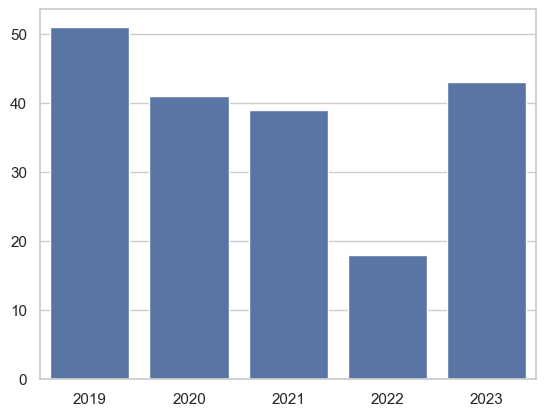

In [77]:
#I can divided them in year (from 2019 to 2023) and plot the results
#I create three functions
#The first and the second are the filters for the count (in the third funciton).
#filter_notafter use variable year (an integer) and the output is a series of boolean values

def filter_notafter(year):
    return df_books["Date Read"]<datetime.datetime(year,1,1)
def filter_notbefore(year):
    return df_books["Date Read"]>=datetime.datetime(year,1,1)
def books_read_in(year):
    return df_books.where(filter_notafter(year+1) & filter_notbefore(year))["Date Read"].count()
    
books_read_func = {}
for i in range(2019, 2023):
    books_read_func[i] = books_read_in(i)

#PLOT DATA
print("Books read per year:")
sns.set_theme(style="whitegrid")
sns.barplot(books_read_func, x=books_read.keys(), y=books_read.values())

Date Added
2018-06-18    12
2018-08-14    21
2018-08-15    22
2018-09-07     1
2018-09-17     2
              ..
2023-08-07     3
2023-08-13     1
2023-08-14     2
2023-08-15     1
2023-08-19    28
Name: Date Added, Length: 241, dtype: int64


<Axes: xlabel='Date Added', ylabel='Date Added'>

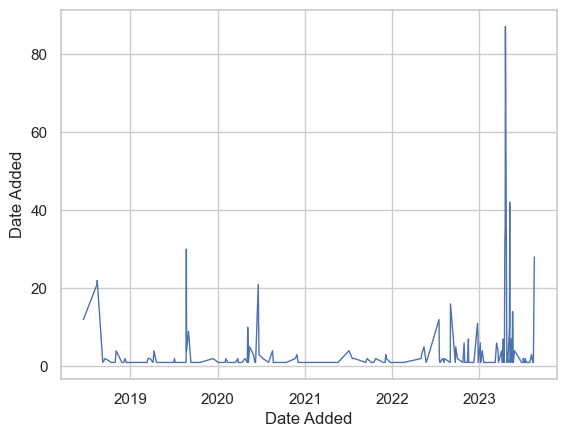

In [28]:
#PLOT DATA
#Number of books added in goodreads for date
sns.set_theme(style="whitegrid")
data = df_books.groupby(["Date Added"])["Date Added"].count()
sns.lineplot(data=data, linewidth=1)

<Axes: >

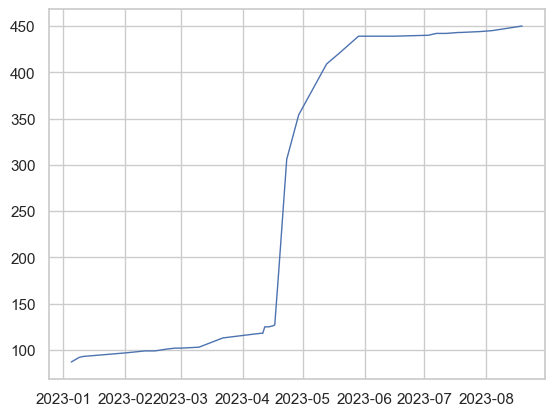

In [29]:
#Ogni volta che ho finito un libro (nel 2023), qual è il numero di libri in whishlist
df_2023 = df_books.loc[(df_books["Date Read"]>datetime.datetime(2022,12,31)) & (df_books["Date Read"]<datetime.datetime(2024, 1, 1))]
df_2023.head()


dict_books = {}
for i in df_2023["Date Read"]:
    dict_books[i] = df_books.where((df_books["Date Added"]<i) & (df_books["Exclusive Shelf"] == "to-read"))["Date Added"].count()
dict_books
sns.lineplot(data=dict_books, linewidth=1)

<Axes: >

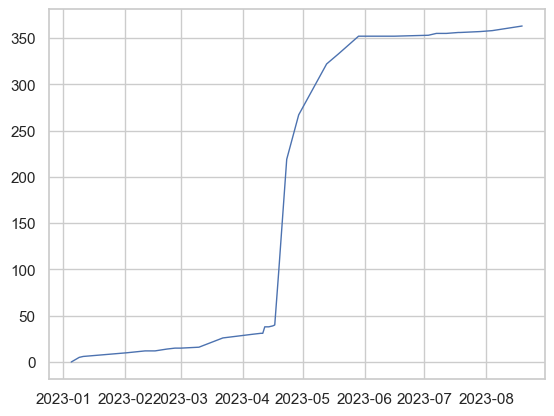

In [30]:
dict_books_added = {}
base = df_books.where((df_books["Date Added"]<datetime.datetime(2023,1,1)) & (df_books["Exclusive Shelf"] == "to-read"))["Date Added"].count()
for i in df_2023["Date Read"]:
    dict_books_added[i] = (df_books.where((df_books["Date Added"]<i) & (df_books["Exclusive Shelf"] == "to-read"))["Date Added"].count()) - base
sns.lineplot(data=dict_books_added, linewidth=1)